In [1]:
import autograd.numpy as np
from autograd import grad
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
sns.set_style('whitegrid')

In [2]:
def hamiltonian(qp):
    q_x = qp[0]
    q_y = qp[1]
    p_x = qp[2]
    p_y = qp[3]
    return (p_x**2 + p_y**2) / 2 - 9.81 * q_y

In [3]:
def dhdq_func(qp):
    return [0, -9.81]

def dhdp_func(qp):
    p_x = qp[2]
    p_y = qp[3]
    return [p_x, p_y]

In [4]:
def symplectic(t, qp):
    dhdq = np.array(dhdq_func(qp))
    dhdp = np.array(dhdp_func(qp))
    return np.array([dhdp, -dhdq]).flatten()

In [5]:
def horizontal_throw(energies, t_span, t_points):
    q = []
    p = []

    q_dot = []
    p_dot = []

    t_eval = np.linspace(t_span[0], t_span[1], t_points)

    for E in energies:
        t = np.random.uniform(0, 2)
        qy_init = 0
        qx_init = 0
        px_init = np.sqrt(2 * E + 2 * 9.81)
        py_init = 0
        y0 = np.array([[qx_init, qy_init], [px_init, py_init]])
        
        symplectic_ivp = solve_ivp(fun=symplectic, t_span=t_span, y0=y0.flatten(), t_eval=t_eval)
        q.append(np.array([symplectic_ivp['y'][0] + np.random.normal(0, 0.1, t_span[1]), -symplectic_ivp['y'][1] + np.random.normal(0, 0.1, t_span[1])]))
        p.append(np.array([symplectic_ivp['y'][2] + np.random.normal(0, 0.1, t_span[1]), symplectic_ivp['y'][3] + np.random.normal(0, 0.1, t_span[1])]))
        
        dots = np.array([np.array(symplectic(None, qp)) for qp in symplectic_ivp['y'].T])

        # dimension of these two arrays below need some work
        q_dot.append(np.array([dots[:,0], dots[:,1]]))
        p_dot.append(np.array([dots[:,2], dots[:,3]]))
            
    q = np.array(q)
    p = np.array(p)

    q_dot = np.array(q_dot)
    p_dot = np.array(p_dot)

    return q, p, q_dot, p_dot

In [6]:
energies = np.random.uniform(0.2, 100, 50)

In [7]:
q, p, q_dot, p_dot = horizontal_throw(energies, [0, 100], 100)

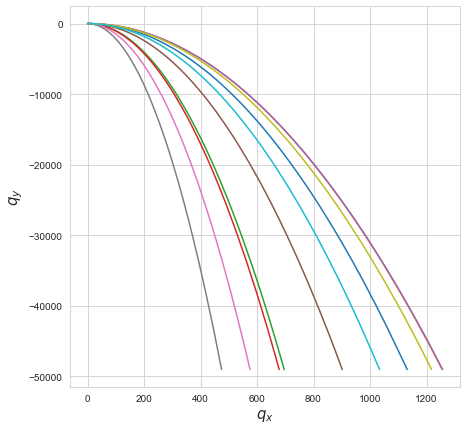

In [8]:
plt.figure(figsize=(7,7))
for i in range(10): 
    plt.plot(q[i][0], q[i][1])

plt.xlabel(r'$q_x$', size=15)
plt.ylabel(r'$q_y$', size=15)
plt.show()

In [237]:
print(q[0][0][0], q[0][1][0], p[0][0][0], p[0][1][0])

-0.057396069770667635 -0.05991352183070442 13.81571136317636 0.14349559666062572


In [238]:
print(q[0][0])

[-5.73960698e-02  1.40977960e+01  2.82969539e+01  4.24136053e+01
  5.65088617e+01  7.06745991e+01  8.49087779e+01  9.89260207e+01
  1.13260393e+02  1.27251804e+02  1.41445260e+02  1.55533213e+02
  1.69656307e+02  1.83782065e+02  1.97831466e+02  2.11932258e+02
  2.26167102e+02  2.40455174e+02  2.54548745e+02  2.68654163e+02
  2.82596784e+02  2.96999091e+02  3.11070064e+02  3.25070522e+02
  3.39234115e+02  3.53480198e+02  3.67666409e+02  3.81757432e+02
  3.95935463e+02  4.09937302e+02  4.24075929e+02  4.38513290e+02
  4.52475478e+02  4.66685070e+02  4.80725727e+02  4.94803618e+02
  5.08996690e+02  5.23144564e+02  5.37101587e+02  5.51532025e+02
  5.65632244e+02  5.79449269e+02  5.93632510e+02  6.08002557e+02
  6.22109810e+02  6.36142967e+02  6.50369548e+02  6.64388055e+02
  6.78621272e+02  6.92833766e+02  7.06908672e+02  7.20917009e+02
  7.35154470e+02  7.49303923e+02  7.63387207e+02  7.77779053e+02
  7.91565874e+02  8.05628505e+02  8.19997691e+02  8.34099678e+02
  8.48244631e+02  8.62341

In [239]:
print(q[0][1])

[-5.99135218e-02 -5.04978333e+00 -1.99671486e+01 -4.50858160e+01
 -8.00375463e+01 -1.25241248e+02 -1.80161475e+02 -2.45283435e+02
 -3.20142047e+02 -4.05421810e+02 -5.00371213e+02 -6.05613165e+02
 -7.20629731e+02 -8.45753722e+02 -9.81057460e+02 -1.12596866e+03
 -1.28113415e+03 -1.44634633e+03 -1.62142862e+03 -1.80667205e+03
 -2.00177479e+03 -2.20701118e+03 -2.42216497e+03 -2.64752575e+03
 -2.88266363e+03 -3.12792110e+03 -3.38306651e+03 -3.64827353e+03
 -3.92357231e+03 -4.20885431e+03 -4.50415867e+03 -4.80967050e+03
 -5.12466118e+03 -5.45002564e+03 -5.78539662e+03 -6.13040583e+03
 -6.48605401e+03 -6.85153718e+03 -7.22661640e+03 -7.61185806e+03
 -8.00724402e+03 -8.41272002e+03 -8.82810495e+03 -9.25340275e+03
 -9.68884715e+03 -1.01342798e+04 -1.05897863e+04 -1.10551812e+04
 -1.15307434e+04 -1.20159664e+04 -1.25116016e+04 -1.30166935e+04
 -1.35324154e+04 -1.40580651e+04 -1.45934536e+04 -1.51388283e+04
 -1.56942703e+04 -1.62601290e+04 -1.68353717e+04 -1.74209093e+04
 -1.80167768e+04 -1.86221

In [253]:
np.stack((q[0][0], q[0][1]), axis=1)

array([[-5.73960698e-02, -5.99135218e-02],
       [ 1.40977960e+01, -5.04978333e+00],
       [ 2.82969539e+01, -1.99671486e+01],
       [ 4.24136053e+01, -4.50858160e+01],
       [ 5.65088617e+01, -8.00375463e+01],
       [ 7.06745991e+01, -1.25241248e+02],
       [ 8.49087779e+01, -1.80161475e+02],
       [ 9.89260207e+01, -2.45283435e+02],
       [ 1.13260393e+02, -3.20142047e+02],
       [ 1.27251804e+02, -4.05421810e+02],
       [ 1.41445260e+02, -5.00371213e+02],
       [ 1.55533213e+02, -6.05613165e+02],
       [ 1.69656307e+02, -7.20629731e+02],
       [ 1.83782065e+02, -8.45753722e+02],
       [ 1.97831466e+02, -9.81057460e+02],
       [ 2.11932258e+02, -1.12596866e+03],
       [ 2.26167102e+02, -1.28113415e+03],
       [ 2.40455174e+02, -1.44634633e+03],
       [ 2.54548745e+02, -1.62142862e+03],
       [ 2.68654163e+02, -1.80667205e+03],
       [ 2.82596784e+02, -2.00177479e+03],
       [ 2.96999091e+02, -2.20701118e+03],
       [ 3.11070064e+02, -2.42216497e+03],
       [ 3.

In [229]:
q = np.reshape(q, (50, 100, 2))
p = np.reshape(p, (50, 100, 2))

In [230]:
q[0][0]

array([-0.0433906 ,  7.53446073])

In [168]:
X = np.stack((q, p), axis=3)
y = np.stack((q_dot, p_dot), axis=-1)
X[0][0]

array([[-0.06284653,  7.63882781],
       [ 7.3776969 ,  7.37775982]])

In [121]:
X = torch.Tensor(X)
y = torch.Tensor(y)
X.shape

torch.Size([50, 2, 100, 2])